# Jordan Neural Networks 

乔丹网络是一个单隐层前馈神经网络。它与Elman神经网络类似。唯一不同的是，上下文（延迟）神经元是从输出层而不是隐藏层输入的，见图。因此，它 "记住 "了前一个时间步长的输出。与Elman神经网络一样，它对于预测记忆力较短的时间序列观测值非常有用。

## The Fastest Path to Data Preparation

In [1]:
%%html
<img src='Jordan Neural Network.png'> 

In [2]:
import numpy as np
import pandas as pd
loc= "update_COE.csv"
temp = pd.read_csv(loc)
data = temp.drop(temp.columns[[0,1]], axis=1)
y=data['COE$']
x=data.drop(data.columns[[0,4]], axis =1)#drop the first line
x=x.apply(np.log)
x=pd.concat([x, data['Open?']], axis =1)
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape(len(x),4)
x = scaler_x.fit_transform(x)
scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape(len(y),1)
y = np.log(y)
y = scaler_y.fit_transform(y)
y = y.tolist()
x = x.tolist()

## A Straightforward Module for Jordan Neural Networks

In [3]:
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.recurrent import JordanRecurrent
import random
random.seed(2020)
fit1 = NeuralNet()
input_nodes = 4
hidden_nodes = 7
output_nodes = 1
existing_weight_factor = 0.9

python对象fit1将包含模型。它在隐藏层中有7个节点，每个属性有一个输入节点，一个输出节点 existing_weight_factor设置为90%。

## Specifying the Model

In [4]:
fit1.init_layers(input_nodes,[hidden_nodes],output_nodes,JordanRecurrent(existing_weight_factor))
fit1.randomize_network()
fit1.layers[1].set_activation_type('sigmoid')
fit1.set_learnrate(0.05)
fit1.set_all_inputs(x)
fit1.set_all_targets(y)

In [5]:
length = len(x)
learn_end_point = int( length * 0.95 )
fit1.set_learn_range( 0, learn_end_point )
fit1.set_test_range( learn_end_point + 1, length-1)

## Assessing Model Fit and Performance


In [6]:
fit1.learn(epochs=100, show_epoch_results=True, random_testing=False)

epoch: 0 MSE: 0.02756976006555051
epoch: 1 MSE: 0.0017891039121393413
epoch: 2 MSE: 0.0017927398115218077
epoch: 3 MSE: 0.00179617206811605
epoch: 4 MSE: 0.0017993037139506258
epoch: 5 MSE: 0.0018020614777377673
epoch: 6 MSE: 0.001804413431678592
epoch: 7 MSE: 0.0018063813053438387
epoch: 8 MSE: 0.0018080409921350077
epoch: 9 MSE: 0.0018095085575351522
epoch: 10 MSE: 0.0018109157164729226
epoch: 11 MSE: 0.0018123839557071825
epoch: 12 MSE: 0.001814006340042073
epoch: 13 MSE: 0.0018158409766969817
epoch: 14 MSE: 0.0018179142686069116
epoch: 15 MSE: 0.0018202291285664065
epoch: 16 MSE: 0.0018227737299625953
epoch: 17 MSE: 0.0018255283792432291
epoch: 18 MSE: 0.001828469950989018
epoch: 19 MSE: 0.001831574327602257
epoch: 20 MSE: 0.0018348175502832693
epoch: 21 MSE: 0.0018381762780225457
epoch: 22 MSE: 0.001841627942802443
epoch: 23 MSE: 0.0018451508108242671
epoch: 24 MSE: 0.0018487240428964795
epoch: 25 MSE: 0.0018523277827146335
epoch: 26 MSE: 0.0018559432713441241
epoch: 27 MSE: 0.001

In [7]:
mse = fit1.test()
np.round(mse, 6)

0.000178

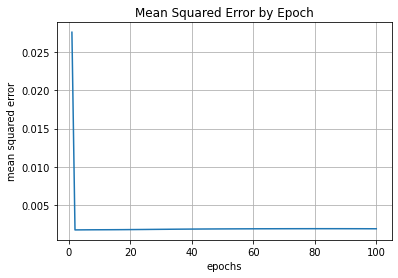

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(fit1.accum_mse) + 1, 1), fit1.accum_mse)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.grid(True)
plt.title("Mean Squared Error by Epoch")
fig = plt.gcf()
plt.show()

In [9]:
# 测试实际值
test_reals = data['COE$'][learn_end_point + 1:length].tolist()
print("test_reals are (时间长度为%d):" % len(test_reals))
print(test_reals)

test_reals are (时间长度为13):
[10803.0, 11101.0, 12699.0, 13605.0, 15200.0, 14900.0, 13000.0, 12605.0, 14156.0, 14501.0, 14669.0, 13499.0, 13301.0]


In [10]:
# 模型反归一化变换得到真实际值
retrieved_reals = [np.exp(
        scaler_y.inverse_transform(
            np.array(item).reshape(-1, 1)
        ))[0][0] for item in fit1.test_targets_activations]
print("retrieved_reals are(时间长度为%d):" % len(retrieved_reals))
print(retrieved_reals)

retrieved_reals are(时间长度为12):
[10802.999999999998, 11100.99999999999, 12699.000000000002, 13604.999999999989, 15200.000000000007, 14899.999999999967, 12999.99999999999, 12605.0, 14156.000000000004, 14501.000000000004, 14668.999999999995, 13499.000000000004]


In [11]:
# 模型对价格的预测值
forecast = [np.exp(
        scaler_y.inverse_transform(
            np.array(item).reshape(-1, 1)
        ))[1][0] for item in fit1.test_targets_activations]
print("forecasts are(时间长度为%d):" % len(forecast))
print(forecast)

forecasts are(时间长度为12):
[12529.823333151431, 12753.275675027942, 12760.245994257333, 13294.491855341226, 13373.763355280766, 13320.897254432375, 13448.347553548501, 13385.720135365687, 13623.901712778763, 13418.2754206552, 13455.958293329752, 12897.694327246376]


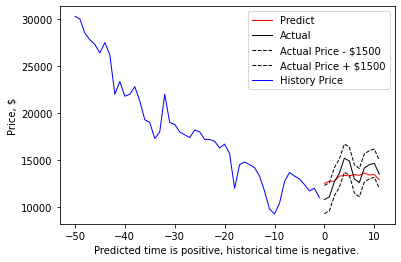

In [12]:
real = np.array(data['COE$']).reshape(-1)
history_time_length = 50
ahead = 12
plt.plot(range(0, ahead), forecast, '-r', label=u"Predict", linewidth=1)
plt.plot(range(0, ahead), test_reals[0:ahead], color='black', label=u"Actual", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) - 1500, '--k',
             label=u"Actual Price - $1500", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) + 1500, '--k',
             label=u"Actual Price + $1500", linewidth=1)
plt.plot(range(-history_time_length, 0),
             real[len(real) - ahead - history_time_length - 1: len(real) - ahead - 1], '-b', label=u"History Price", linewidth=1)
plt.xlabel(u"Predicted time is positive, historical time is negative.")
plt.ylabel(u"Price, $")
plt.legend()
fig = plt.gcf()
plt.show()